In [1]:
from glob import glob
import datetime

import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
from matplotlib.ticker import MultipleLocator

# HR v Age - with Redshift cuts

Since we can't figure out what is happening, does it change with redshift?

In [1]:
dataset = 'campbellG'   # 'gupta' or 'campbell' or 'campbellG'
z_max = 0.2   # campbell is already cut at  ~0.33

## Import HR

In [2]:
if dataset in ['campbell', 'campbellG']:
    # Campbell objects
    # Campbell uncorrected distances
    SNData = pd.read_csv('../data/campbell_local.tsv', sep='\t', usecols=['SNID', 'redshift', 'hr', 'err_mu'], index_col='SNID')
    SNData.rename(columns={'err_mu': 'hr uncert'}, inplace=True)
if dataset == 'gupta':
    # Gupta objects
    # Guptas cosmology
    SNData = pd.read_csv('../data/Gupta11_table2.tsv', sep='\t', skiprows=2, usecols=['x_1 uncert', 'HR'])#, index_col='SN ID')
    SNData.rename(columns={'x_1 uncert': 'hr', 'HR': 'hr uncert' }, inplace=True) # 'cause read_csv is shifting the headers over by one?
print(len(SNData))
SNData.head(5)

103


,redshift,hr uncert,hr
SNID,,,
762,0.191381,0.082145,0.153825
1032,0.129755,0.124407,-0.154126
1371,0.119343,0.061899,-0.137699
1794,0.141910,0.083013,0.273617
2372,0.180465,0.068995,-0.122781


## Cut on Redshift & HR

In [3]:
if dataset in ['campbell', 'campbellG']:
    SNData = SNData[SNData['redshift']<z_max]
    print(len(SNData))

    SNData = SNData[SNData['hr']<0.7]
    SNData = SNData[SNData['hr']>-0.7]
    print(len(SNData))

103
103


## Import Ages

In [4]:
# number of samples desired
num = 100

In [5]:
# test= pd.concat([SNData, ages], axis=1)  ## ages dataframe is going away
test = SNData.copy()
test.dropna(inplace=True)  # drop rows that don't hae both HR & ages
for i in range(num):
    test['random age {}'.format(i)] = np.nan
# test.head(5)
test

,redshift,hr uncert,hr,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,...,random age 90,random age 91,random age 92,random age 93,random age 94,random age 95,random age 96,random age 97,random age 98,random age 99
SNID,,,,,,,,,,,,,,,,,,,,,
762,0.191381,0.082145,0.153825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,0.129755,0.124407,-0.154126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,0.119343,0.061899,-0.137699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794,0.141910,0.083013,0.273617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2372,0.180465,0.068995,-0.122781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2440,0.191139,0.080637,0.196183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3087,0.165510,0.064972,-0.056321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3317,0.161011,0.066719,-0.162320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3592,0.086578,0.059262,0.001613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NOTICE:**

**THIS WILL TAKES A VERY LONG TIME**


Randomness is used to sample the posteriors. Large samples are used to accurately represent the distributions. The seed is randomly choosen and used so that the same plot can be recreated. The seed was not changed in order to make the "best" looking figures.

Also we now need to get the ages and the HR distributions at the same time as we set the seed. This way we can't accidently get one distribution x-times after the seed has already been set. 

In [6]:
np.random.seed(1378052)   #set a seed for reproducibility

if dataset == 'gupta':
    files = '../resources/SN{}_gupta_chain.tsv'
if dataset == 'campbell':
    files = '../resources/SN{}_campbell_chain.tsv'
if dataset == 'campbellG':
    files = '../resources/SN{}_campbellG_chain.tsv'

# for i in SNData.index.values:
for i in test.index.values:
    # So this works with only a partical dataset
    try:
        ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                            usecols=['age'], dtype={'age': np.float64})
        # Get 10 random values of ages_
        # Use randint because it is half open: [low, high)
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
        # Unlike random_integer
        index=np.random.randint(len(ages_), size=num)
        # add the randomly collected ages to the dataframe.
        # `.loc` allows access to the `num` random age "cells"
        # `.values` takes the ages_ from a series to a array
        # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
        test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
    except FileNotFoundError:
        # if data file is not there do nothing
        print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# remove rows where no age was added
# should be a result of hitting the except block.
test.dropna(inplace=True)        

print(test.head(5))


#-----------#


# make sure you add the dtype, or else the regression plots do not work
plot = pd.DataFrame(columns=['hr', 'age'], dtype=np.float64)
plot.loc[0] = 1

for index in range(len(test)):
    for num_ in range(num):
# test.loc[index+1, 'random age {}'.format(num_)]
        # add a small bit of noice on the HR to let the linear fitting work.
        # this remvoes the fact that so many have the SAME HR.
        plot.loc[index*num+num_, ['hr', 'age']] = [test.iloc[index]['hr']+(test.iloc[index]['hr uncert']/3)*np.random.randn(1)[0],
                                                   test.iloc[index]['random age {}'.format(num_)]]
#         print(plot[index*num_+num_, ['hr', 'age']])
#         plot.loc[index_*num_+num_, ['hr', 'age']] = test[index, 'random age {}'.format(num_)]

print(plot.head(5))

      redshift  hr uncert        hr  random age 0  random age 1  random age 2  \
SNID                                                                            
762   0.191381   0.082145  0.153825      1.327254      9.961507      1.809424   
1032  0.129755   0.124407 -0.154126     10.680326      9.404274     10.549782   
1371  0.119343   0.061899 -0.137699      8.966194      8.498341      9.139269   
1794  0.141910   0.083013  0.273617      2.052085      2.180755      1.052039   
2372  0.180465   0.068995 -0.122781      1.579386      6.376666      3.515104   

      random age 3  random age 4  random age 5  random age 6      ...        \
SNID                                                              ...         
762       7.637619      0.409072      8.311169      9.768111      ...         
1032      1.038417      7.680125      1.574132      1.251699      ...         
1371      8.888926     10.576845      8.169736     10.759357      ...         
1794      3.525740      1.188890     

## Make plot

In [9]:
# Set plot configurations

## global v local labels
if dataset in ['gupta', 'campbellG']:
    xlabel = 'global age [Gyr]'
else:
    xlabel = 'local age [Gyr]'
    
    
## Savefig
uuid = 0   #need a place holder
if dataset == 'gupta':
    savename = f'GlobalHRvAge{uuid}.pdf'
elif dataset == 'campbellG':
    savename = f'campbellG-HRvAge{uuid}.pdf'
elif dataset == 'campbell':
    savename = f'LocalHRvAge{uuid}.pdf'
else:
    savename = f'HRvAge{uuid}.pdf'

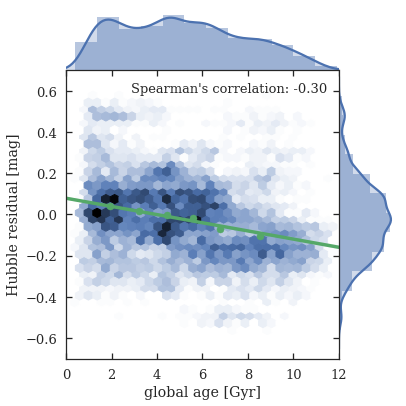

In [11]:
sns.set(context='talk', style='ticks', font='serif', color_codes=True)

#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot[plot['hr']<0.6]['age'], plot[plot['hr']<0.6]['hr'], stat_func=spearmanr,
                  kind="hex", gridsize=30,
# g = sns.jointplot(plot['age'], plot['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.0, xlim=(0,12),  ylim=(-0.7, 0.7),
                  marginal_kws={'bins':12, 'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.set_axisbelow(False)    # bring axis to be ontop of hexbin so that the tick marks are visible

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.2f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')
# fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace -- not needed for this figure.

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# g.savefig(savename)
g.savefig('HRvAge-campbell-global-corrected-z02.pdf')
# g.savefig('HRvAge-gupta-global.pdf')
# g.savefig('HRvAge-campbell-local.pdf')
plt.show()

# Other plots

Lets try

- Splitting the data in half (at 4 Gyr)
- Lets just try that for now

In [40]:
#only for Gupta
plot_old = plot[plot['age']>=6].copy()
plot_young = plot[plot['age']<6].copy()
print(len(plot), len(plot_old), len(plot_young))

6000 2210 3790


In [12]:
plot_old = plot[plot['age']>=7].copy()
plot_young = plot[plot['age']<7].copy()
print(len(plot), len(plot_old), len(plot_young))

10300 2718 7582


In [13]:
print('young: ', plot_young[plot_young['hr']<0.7].describe())
print('old: ', plot_old[plot_old['hr']<0.7].describe())
print('young MAD: ', np.mean(np.absolute(plot_young[plot_young['hr']<0.7]['hr'] - np.mean(plot_young[plot_young['hr']<0.7]['hr']))))
print('old MAD: ', np.mean(np.absolute(plot_old[plot_old['hr']<0.7]['hr'] - np.mean(plot_old[plot_old['hr']<0.7]['hr']))))


young:                  hr          age
count  7582.000000  7582.000000
mean      0.005059     3.864831
std       0.181925     1.787413
min      -0.536242     0.409072
25%      -0.112282     2.237787
50%       0.005517     3.976943
75%       0.109641     5.403025
max       0.575780     6.999837
old:                  hr          age
count  2718.000000  2718.000000
mean     -0.103445     8.763646
std       0.178580     1.132407
min      -0.560374     7.001982
25%      -0.212224     7.796160
50%      -0.136562     8.656629
75%      -0.024712     9.590870
max       0.641382    11.915318
young MAD:  0.141035455179
old MAD:  0.133012591995


In [16]:
sns.set(context='talk', style='ticks', font='serif', color_codes=True)

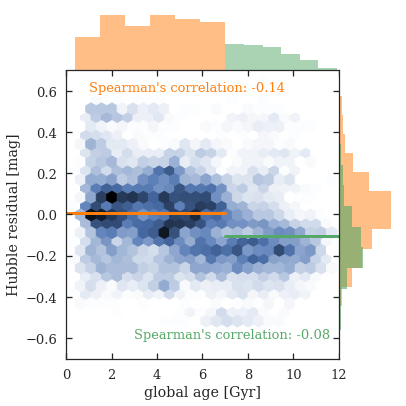

In [19]:
###Main joint data ONLY###

g = sns.jointplot('age', 'hr', data=plot[plot['hr']<0.7], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.0, xlim=(0,12),  ylim=(-0.7, 0.7),
                  marginal_kws={'kde':False, 'hist':False,
                                'kde_kws':{"shade":True}}
                 )
# g_y = g.jointplot('age', 'hr', data=plot_young, stat_func=spearmanr, kind="hex", gridsize=25,
#                   bins=None, space=0.0, xlim=(0,12),  ylim=(-0.7, 0.7), alpha=0,
#                   marginal_kws={'kde':False, 'hist':False,
#                                 'kde_kws':{"shade":True}}
#                  )


##regresion lines##

# color info: https://matplotlib.org/api/colors_api.html
# sns.regplot(plot_young['age'], plot_young['hr'],
#                       x_bins=4, x_ci=None, color='tab:orange',
#                       truncate=True, ax=g.ax_joint)
# sns.regplot(plot_old['age'], plot_old['hr'], 
#                     x_bins=4, x_ci=None, color='g',
#                     truncate=True, ax=g.ax_joint)


##mean lines##

# color info: https://matplotlib.org/api/colors_api.html
length = 50
mean_line_young = np.linspace(0, 7, length)
mean_line_old = np.linspace(7, 12, length)  # set range to be the same as full plot
g.ax_joint.plot(mean_line_young, (plot_young['hr'].mean())*np.ones(length),
         color='tab:orange', linewidth=3)
g.ax_joint.plot(mean_line_old, (plot_old['hr'].mean())*np.ones(length),
         color='g', linewidth=3)
# sns.regplot(plot_young['age'], plot_young['hr'],
#                       x_bins=4, x_ci=None, color='tab:orange',
#                       truncate=True, ax=g.ax_joint)
# sns.regplot(plot_old['age'], plot_old['hr'], 
#                     x_bins=4, x_ci=None, color='g',
#                     truncate=True, ax=g.ax_joint)


##Age distribution plots##

sns.distplot(plot_young[plot_young['hr']<0.7]['age'], bins=6, color='tab:orange',
             axlabel='', label='Age < 4 Gyr', 
             ax=g.ax_marg_x, kde=False,
             hist_kws={"alpha": 0.5})
sns.distplot(plot_old[plot_old['hr']<0.7]['age'], bins=6, color='g',
             axlabel='', label='Age > 4 Gyr', 
             ax=g.ax_marg_x, kde=False,
             hist_kws={"alpha": 0.5})


##Hubble residual distribution plots##

sns.distplot(plot_young[plot_young['hr']<0.7]['hr'], bins=12, vertical=True, color='tab:orange',
             axlabel='', label='Age < 4 Gyr', 
             ax=g.ax_marg_y, kde=False,
             hist_kws={"alpha": 0.5})
# g.ax_marg_y.axhline(plot_young[plot_young['hr']<0.7]['hr'].median(), color='k',
#                     ls=':', lw='2')
sns.distplot(plot_old[plot_old['hr']<0.7]['hr'], bins=12, vertical=True, color='g',
             axlabel='', label='Age > 4 Gyr', 
             ax=g.ax_marg_y, kde=False,
             hist_kws={"alpha": 0.6})
# g.ax_marg_y.axhline(plot_old[plot_old['hr']<0.7]['hr'].median(), color='k')


##Clean up##

#remove total correlation
g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
#                template="{stat}: {val:.2f}")
               template='')

# add other notations
sp_r_y = spearmanr(plot_young['age'], plot_young['hr']).correlation
sp_r_o = spearmanr(plot_old['age'], plot_old['hr']).correlation
g.ax_joint.text(1, 0.6, f"Spearman's correlation: {sp_r_y:.2f}", 
                {'fontsize':13}, color='tab:orange')
g.ax_joint.text(3, -0.6, f"Spearman's correlation: {sp_r_o:.2f}", 
                {'fontsize':13}, color='g')



#add lables
g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')

#adjsut tick marks
g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.set_axisbelow(False)    # bring axis to be ontop of hexbin so that the tick marks are visible

#add legend
# plt.legend()

#save file
# g.savefig('HRvAge-campbell-local-corrected-z02splitDists.pdf')
g.savefig('HRvAge-campbell-show-step.pdf')
plt.show()

In [18]:
spearmanr(plot_young['age'], plot_young['hr']).correlation

-0.1364696964951102